In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Zoo

In [3]:
Zoo=pd.read_csv('Zoo.csv')
print(Zoo.shape)
Zoo.head(10)

(101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


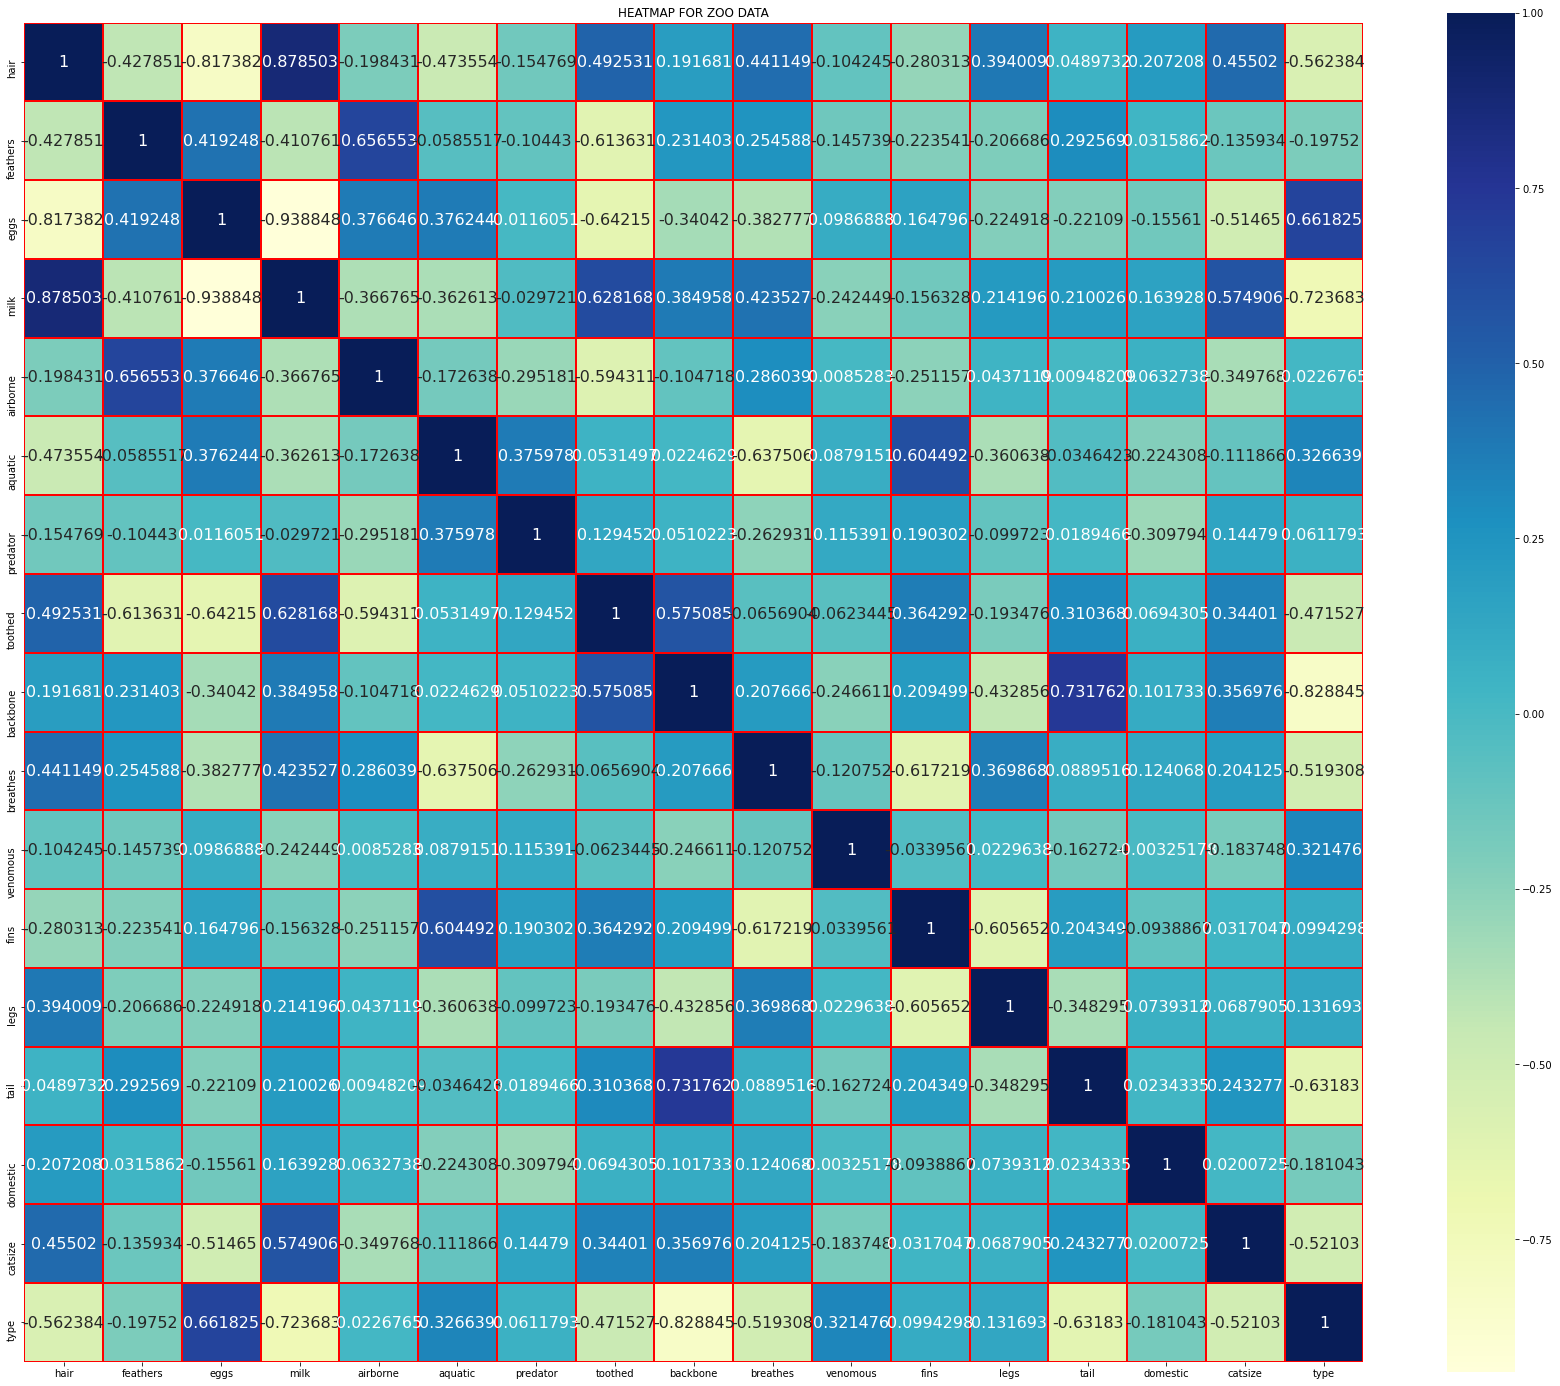

In [5]:
Correlation Plot for Zoo Data
fig,ax = plt.subplots(1,1,figsize=(30,25))
cor = Zoo.corr()
ax=sns.heatmap(cor,annot=True,linewidths=1,linecolor='r',cmap="YlGnBu",fmt="g",square=True, annot_kws={'fontsize':16})
plt.title('HEATMAP FOR ZOO DATA')
plt.show()

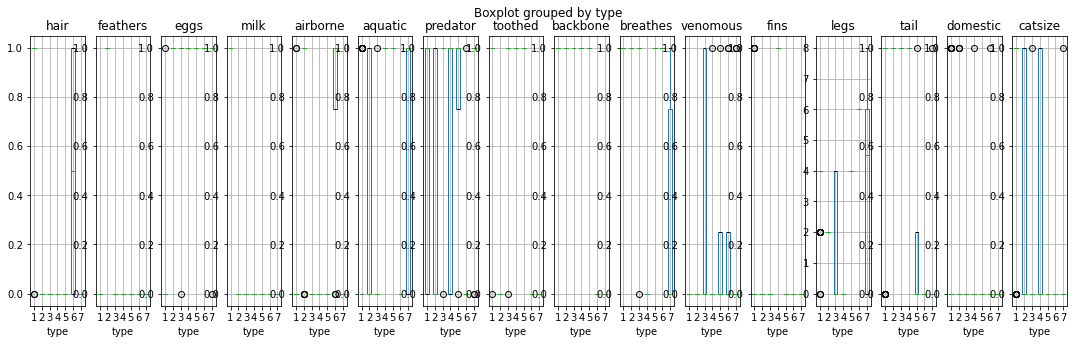

In [6]:
# Box plots for Categorical Target Variable "SalaryGT50K" and continuous predictors
ContinuousColsList=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))
# Creating box plots for each continuous predictor against the Target Variable "SalaryGT50K"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    Zoo.boxplot(column=PredictorCol, by='type', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [7]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('****************************************  ANOVA Results ************************************** \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [8]:
ContinuousVariables=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']
FunctionAnova(inpData=Zoo, TargetVariable='type', ContinuousPredictorList=ContinuousVariables)

****************************************  ANOVA Results ************************************** 

hair is correlated with type | P-Value: 1.8456873398502807e-35
feathers is correlated with type | P-Value: 0.0
eggs is correlated with type | P-Value: 5.514907263184154e-43
milk is correlated with type | P-Value: 0.0
airborne is correlated with type | P-Value: 7.692154832418414e-19
aquatic is correlated with type | P-Value: 7.191672794553616e-11
predator is NOT correlated with type | P-Value: 0.05475628349182613
toothed is correlated with type | P-Value: 5.255950075625824e-51
backbone is correlated with type | P-Value: 0.0
breathes is correlated with type | P-Value: 1.7951436525513168e-33
venomous is correlated with type | P-Value: 0.0026396996437203636
fins is correlated with type | P-Value: 8.972164287150974e-26
legs is correlated with type | P-Value: 8.305909188211792e-15
tail is correlated with type | P-Value: 2.0894335555020327e-19
domestic is NOT correlated with type | P-Value: 0.5847

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'catsize']

In [9]:
Selected_columns = ContinuousVariables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Zoo[Selected_columns], Zoo['type'], test_size=0.2, random_state=0)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80,)
(21,)


In [11]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]
Accuracy of the model on Testing Sample Data: 1.0


In [12]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN,Zoo[Selected_columns], Zoo['type'], cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [1.         1.         1.         1.         1.         0.86666667
 0.86666667 0.86666667 0.85555556 0.9       ]

Final Average Accuracy of the model: 0.94


In [13]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

In [14]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.0
RMSE value for k=  2 is: 0.0
RMSE value for k=  3 is: 0.0
RMSE value for k=  4 is: 0.2558831578595795
RMSE value for k=  5 is: 0.3323795879355267
RMSE value for k=  6 is: 0.4256958200604407
RMSE value for k=  7 is: 0.46656947481584343
RMSE value for k=  8 is: 0.5059173657351376
RMSE value for k=  9 is: 0.5576679417142028
RMSE value for k=  10 is: 0.6125668087956572
RMSE value for k=  11 is: 0.6486143011139999
RMSE value for k=  12 is: 0.7326024496316875
RMSE value for k=  13 is: 0.804677786330673
RMSE value for k=  14 is: 0.7866413825391034
RMSE value for k=  15 is: 0.8565959454472183
RMSE value for k=  16 is: 0.8851452665281235
RMSE value for k=  17 is: 0.9414390390047225
RMSE value for k=  18 is: 1.009944672846223
RMSE value for k=  19 is: 1.0756260390153918
RMSE value for k=  20 is: 1.148705275309472


<AxesSubplot:>

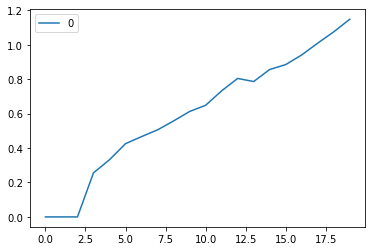

In [15]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [16]:
X=X_train
y=y_train
print(X.shape,y.shape)

(80, 16) (80,)


[Text(0.5, 0, 'Type of Animal Categor'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Before SMOTE')]

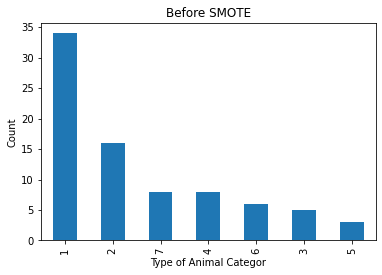

In [17]:
ax = y.value_counts().plot(kind="bar")
ax.set(xlabel="Type of Animal Categor", ylabel="Count", title = "Before SMOTE")

In [37]:
!pip install -U imbalanced-learn

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'D:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [ ]:
conda install -c conda-forge imbalanced-learn

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_minmax)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)
x_res, y_res = sm.fit_resample(X_norm,y)
y_res_df = pd.DataFrame(y_res)
#print(y_res_df.head())
ax = y_res_df.type.value_counts().plot(kind="bar")
ax.set(xlabel="Type of Animal Category", ylabel="Count", title = "After SMOTE")

# 2.Import the Glass Data

In [23]:
Glass=pd.read_csv('glass.csv')
print(Glass.shape)
Glass.head(10)

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [24]:
Glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


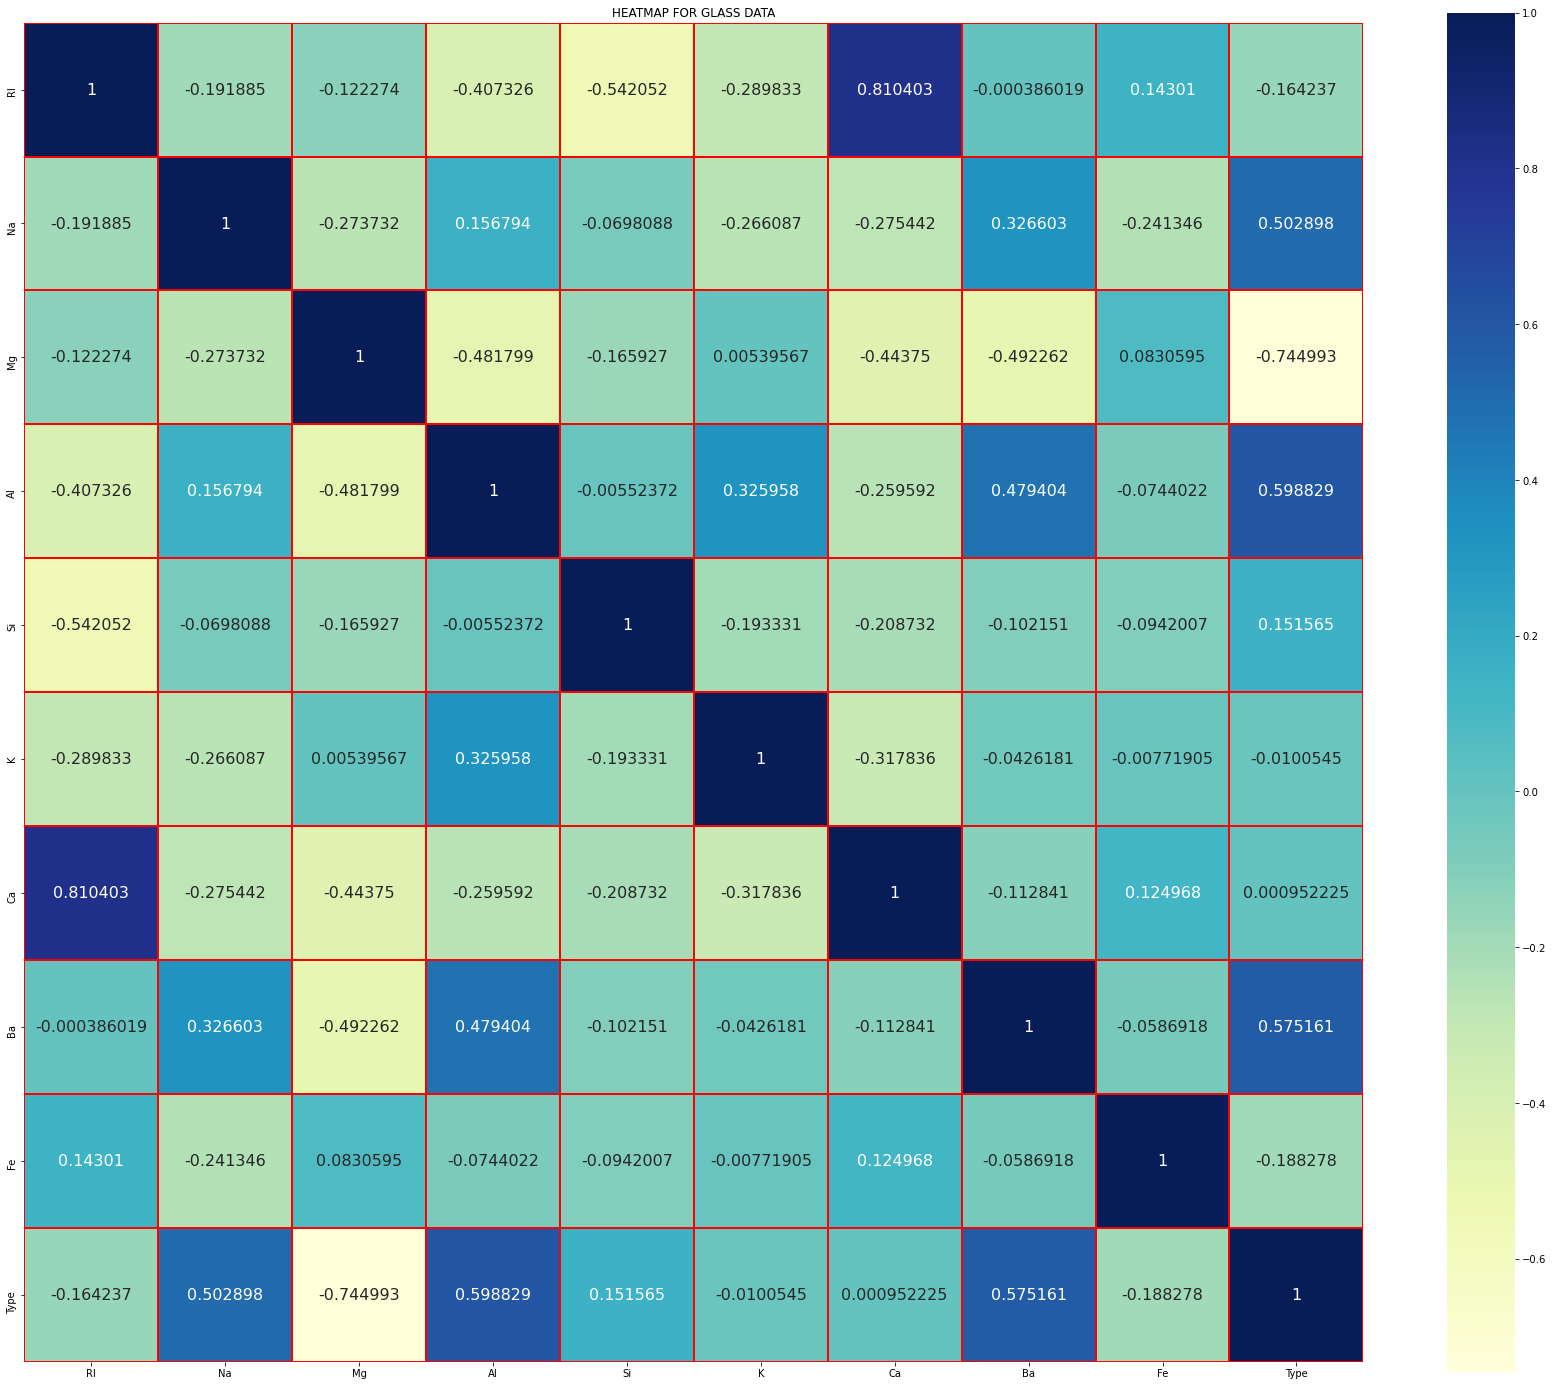

In [25]:
# Correlation plot for Glass Data
fig,ax = plt.subplots(1,1,figsize=(30,25))
cor = Glass.corr()
ax=sns.heatmap(cor,annot=True,linewidths=1,linecolor='r',cmap="YlGnBu",fmt="g",square=True, annot_kws={'fontsize':16})
plt.title('HEATMAP FOR GLASS DATA')
plt.show()

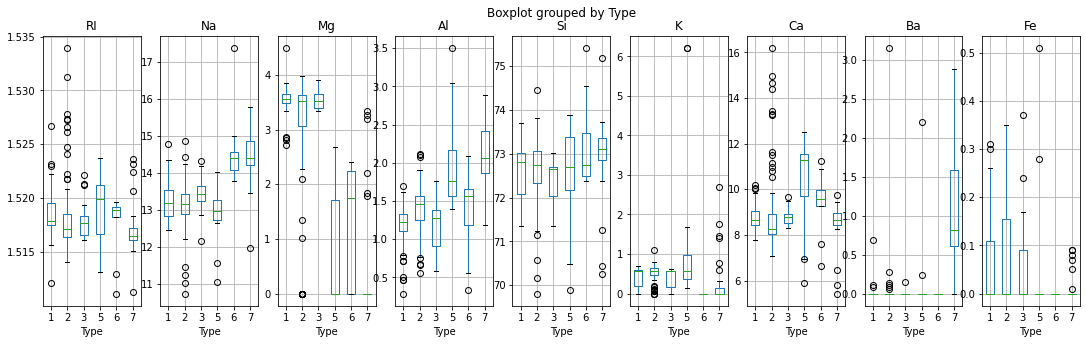

In [26]:
# Box plots for Categorical Target Variable "SalaryGT50K" and continuous predictors
ContinuousColsList=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))
# Creating box plots for each continuous predictor against the Target Variable "SalaryGT50K"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    Glass.boxplot(column=PredictorCol, by='Type', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [27]:
ContinuousVariables=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
FunctionAnova(inpData=Glass, TargetVariable='Type', ContinuousPredictorList=ContinuousVariables)

****************************************  ANOVA Results ************************************** 

RI is NOT correlated with Type | P-Value: 0.15903051836413615
Na is correlated with Type | P-Value: 5.409374669784692e-22
Mg is correlated with Type | P-Value: 7.282906800464474e-41
Al is correlated with Type | P-Value: 2.590282909598943e-26
Si is correlated with Type | P-Value: 0.01846376943388386
K is correlated with Type | P-Value: 1.507240457880321e-07
Ca is correlated with Type | P-Value: 0.012973480423764424
Ba is correlated with Type | P-Value: 3.8394662443289914e-28
Fe is correlated with Type | P-Value: 0.021359084950556793


['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Glass[ContinuousVariables], Glass['Type'], test_size=0.2, random_state=0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171,)
(43,)


In [30]:
clf = KNeighborsClassifier(n_neighbors=3)
# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           1       0.26      0.56      0.36         9
           2       0.79      0.58      0.67        19
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.56        43
   macro avg       0.65      0.58      0.59        43
weighted avg       0.61      0.56      0.56        43

[[ 5  3  1  0  0  0]
 [ 8 11  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 1  0  0  0  0  5]]
Accuracy of the model on Testing Sample Data: 0.56


In [31]:
Accuracy_Values=cross_val_score(KNN,Glass[ContinuousVariables], Glass['Type'], cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.56632761 0.41905901 0.69607843 0.48636364 0.68085901 0.82679739
 0.72619048 0.3968254  0.65952381 0.6399093 ]

Final Average Accuracy of the model: 0.61


In [32]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.806946584785929
RMSE value for k=  2 is: 0.6734154528172214
RMSE value for k=  3 is: 0.7809091633775521
RMSE value for k=  4 is: 0.911808833493737
RMSE value for k=  5 is: 0.8996123196029472
RMSE value for k=  6 is: 0.9462287446539036
RMSE value for k=  7 is: 1.0002372760740477
RMSE value for k=  8 is: 0.9695584586043086
RMSE value for k=  9 is: 1.003439391065437
RMSE value for k=  10 is: 1.0248085470660042
RMSE value for k=  11 is: 1.0743993847983013
RMSE value for k=  12 is: 1.0670360310096694
RMSE value for k=  13 is: 1.0592077288226225
RMSE value for k=  14 is: 1.0642059993781665
RMSE value for k=  15 is: 1.0394790983303286
RMSE value for k=  16 is: 1.0425190311128896
RMSE value for k=  17 is: 1.0531845586855026
RMSE value for k=  18 is: 1.0477406889344916
RMSE value for k=  19 is: 1.0557481403244302
RMSE value for k=  20 is: 1.0496123315356143


In [33]:
X=X_train
y=y_train
print(X.shape,y.shape)

(171, 9) (171,)


[Text(0.5, 0, 'Type of Glass'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Before SMOTE')]

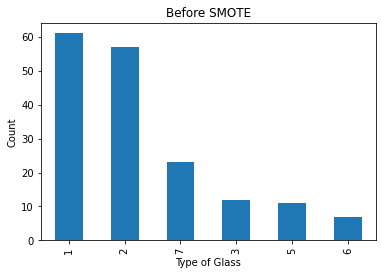

In [34]:
ax = y.value_counts().plot(kind="bar")
ax.set(xlabel="Type of Glass", ylabel="Count", title = "Before SMOTE")

In [35]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_norm = pd.DataFrame(X_minmax)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)
x_res, y_res = sm.fit_resample(X_norm,y)
y_res_df = pd.DataFrame(y_res)
#print(y_res_df.head())
ax = y_res_df.Type.value_counts().plot(kind="bar")
ax.set(xlabel="Type of Animal Category", ylabel="Count", title = "After SMOTE")